In [1]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
df_train_ = pd.read_csv("train.csv")
df_test_ = pd.read_csv("test.csv")
train = df_train_
train.drop(["Id"],axis=1,inplace=True)
test = df_test_
test.drop(["Id"],axis=1,inplace=True)
df = pd.concat([train,test],ignore_index=True)
df.drop(["SalePrice"],axis=1,inplace=True)

In [189]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [190]:
train.info()#"MSSubClass","OverallQual","OverallCond", sayısal tipinde ama kategorik olanlar
#Aynı zamanda Alley,PoolQC,Fence,MiscFeature çok sayıda boş değere sahip olan değişkenler, bunları veriden çıkarmak iyi olabilir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [191]:
#Train 
cat_cols = [col for col in train.columns if train[col].dtypes=="O"]
num_but_cat = [col for col in train.columns if train[col].nunique()<26 and train[col].dtypes!="O"]
cat_cols = num_but_cat + cat_cols
cat_but_car = [col for col in train.columns if train[col].nunique()>30 and train[col].dtypes=="O"]
num_cols = [col for col in train.columns if train[col].dtypes!="O"]
num_cols = [col for col in num_cols if col not in cat_cols]
num_cols = [col for col in num_cols if "SalePrice" not in col]

In [192]:
#Test
cat_cols_t = [col for col in test.columns if test[col].dtypes=="O"]
num_but_cat_t = [col for col in test.columns if test[col].nunique()<26 and test[col].dtypes!="O"]
cat_cols_t = num_but_cat_t + cat_cols_t
cat_but_car_t = [col for col in test.columns if test[col].nunique()>30 and test[col].dtypes=="O"]
num_cols_t = [col for col in test.columns if test[col].dtypes!="O"]
num_cols_t = [col for col in num_cols if col not in cat_cols]

In [193]:
#df
cat_cols_df = [col for col in df.columns if df[col].dtypes=="O"]
num_but_cat_df = [col for col in df.columns if df[col].nunique()<26 and df[col].dtypes!="O"]
cat_cols_df = num_but_cat_df + cat_cols_df
cat_but_car_df = [col for col in df.columns if df[col].nunique()>30 and df[col].dtypes=="O"]
num_cols_df = [col for col in df.columns if df[col].dtypes!="O"]
num_cols_df = [col for col in num_cols_df if col not in cat_cols_df]

In [194]:
test.shape,train.shape,df.shape

((1459, 79), (1460, 80), (2919, 79))

In [195]:
#scaling
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
#train[num_cols] = rs.fit_transform(train[num_cols])
#test[num_cols_t] = rs.fit_transform(test[num_cols_t])
df[num_cols_df] = rs.fit_transform(df[num_cols_df])

In [196]:
#Encoding
def one_hot_encoder(dataframe,categorical_cols,drop_first=False):
    dataframe = pd.get_dummies(dataframe,columns=categorical_cols,drop_first=drop_first)
    return dataframe 

In [197]:
df=one_hot_encoder(df,cat_cols_df)

In [198]:
#train = pd.get_dummies(train)

In [199]:
#test = one_hot_encoder(test,cat_cols_t)

In [200]:
df

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,BsmtFullBath_0.0,BsmtFullBath_1.0,BsmtFullBath_2.0,BsmtFullBath_3.0,BsmtHalfBath_0.0,BsmtHalfBath_1.0,BsmtHalfBath_2.0,FullBath_0,FullBath_1,FullBath_2,FullBath_3,FullBath_4,HalfBath_0,HalfBath_1,HalfBath_2,BedroomAbvGr_0,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_0,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,TotRmsAbvGrd_2,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_13,TotRmsAbvGrd_14,TotRmsAbvGrd_15,Fireplaces_0,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,GarageCars_0.0,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,GarageCars_5.0,PoolArea_0,PoolArea_144,PoolArea_228,PoolArea_368,PoolArea_444,PoolArea_480,PoolArea_512,PoolArea_519,PoolArea_555,PoolArea_561,PoolArea_576,PoolArea_648,PoolArea_738,PoolArea_800,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd

In [201]:
X=df.loc[train.index]
y=train["SalePrice"]
test=df.loc[test.index]
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_value, y_train, y_value = train_test_split(X, y, test_size=0.2, random_state=2020)

In [203]:
xgb =XGBRegressor(random_state=17).fit(X_train,y_train)

In [204]:
pred = xgb.predict(X_value)
pred_train = xgb.predict(X_train)

In [205]:
rmse = np.sqrt(mean_squared_error(y_value,pred))

In [206]:
rmse#test hatası

25683.186279390065

In [207]:
rmse = np.sqrt(mean_squared_error(y_train,pred_train))

In [208]:
rmse#train hatası

1556.6870051976473

In [209]:
pred_test = xgb.predict(test) #test verisetinden tahmin edilen değerler

In [210]:
cv_results = cross_validate(xgb,X_value,y_value,cv=5,
                           scoring="neg_root_mean_squared_error")

In [212]:
#LGBM Regressor
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(random_state=17).fit(X_train,y_train)

In [213]:
pred = lgbm.predict(X_value)

In [214]:
pred_train = lgbm.predict(X_train)

In [215]:
rmse = np.sqrt(mean_squared_error(y_value,pred))

In [216]:
rmse

25472.75424359233

In [217]:
rmse = np.sqrt(mean_squared_error(y_train,pred_train))

In [218]:
rmse

12536.136728859416

In [219]:
cv_results = cross_validate(lgbm,X_value,y_value,cv=5,
                           scoring="neg_root_mean_squared_error")

In [220]:
cv_results["test_score"].mean()

-31459.377917111113

In [221]:
#Lgbm xgboosttan ilk etapta daha iyi sonuçlar verdi.

In [222]:
#CatBoost
from catboost import CatBoostRegressor
cat = CatBoostRegressor(random_state=17).fit(X_train,y_train,verbose=False)

In [223]:
pred = cat.predict(X_value)
pred_train = cat.predict(X_train)

In [224]:
rmse = np.sqrt(mean_squared_error(y_value,pred))
rmse

22407.592665451626

In [225]:
rmse = np.sqrt(mean_squared_error(y_train,pred_train))
rmse

5707.808323624267

In [ ]:
#EDA & Data Preprocessing

In [77]:
df_train_ = pd.read_csv("train.csv")
df_test_ = pd.read_csv("test.csv")
train = df_train_
train.drop(["Id"],axis=1,inplace=True)
test = df_test_
test.drop(["Id"],axis=1,inplace=True)
df = pd.concat([train,test],ignore_index=True)
df.drop(["SalePrice"],axis=1,inplace=True)

In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [5]:
df.shape

(2919, 79)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [7]:
#Eksik değer yakalama
df.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

In [78]:
def missing_values_table(dataframe,na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum()>0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

In [79]:
na_columns = missing_values_table(df, na_name=True)

              n_miss  ratio
PoolQC          2909  99.66
MiscFeature     2814  96.40
Alley           2721  93.22
Fence           2348  80.44
FireplaceQu     1420  48.65
LotFrontage      486  16.65
GarageFinish     159   5.45
GarageQual       159   5.45
GarageCond       159   5.45
GarageYrBlt      159   5.45
GarageType       157   5.38
BsmtExposure      82   2.81
BsmtCond          82   2.81
BsmtQual          81   2.77
BsmtFinType2      80   2.74
BsmtFinType1      79   2.71
MasVnrType        24   0.82
MasVnrArea        23   0.79
MSZoning           4   0.14
BsmtFullBath       2   0.07
BsmtHalfBath       2   0.07
Functional         2   0.07
Utilities          2   0.07
GarageArea         1   0.03
GarageCars         1   0.03
Electrical         1   0.03
KitchenQual        1   0.03
TotalBsmtSF        1   0.03
BsmtUnfSF          1   0.03
BsmtFinSF2         1   0.03
BsmtFinSF1         1   0.03
Exterior2nd        1   0.03
Exterior1st        1   0.03
SaleType           1   0.03


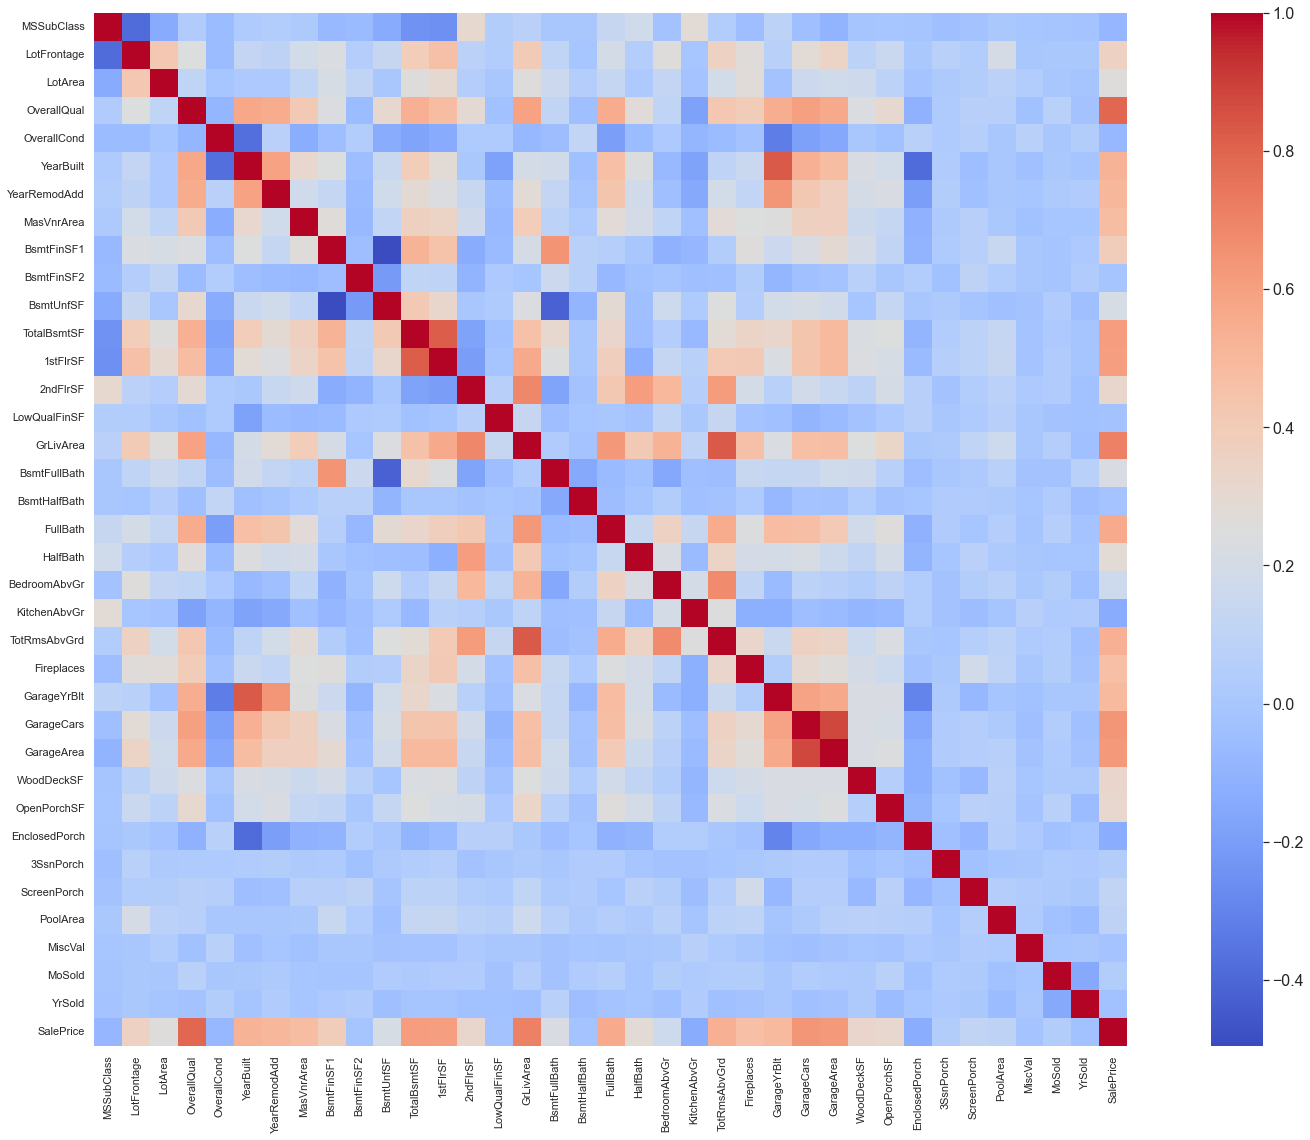

In [80]:
from matplotlib import pyplot as plt
import seaborn as sns

corr_target = train.corr()

f, ax = plt.subplots(figsize=(30, 19))
sns.set(font_scale=1.45)
sns.heatmap(corr_target, square=True,cmap='coolwarm');

In [81]:
#SalePrice değişkeni ile en yüksek korelasyon yüzdesine sahip olan ilk 10 değişken
correlations = corr_target["SalePrice"].sort_values(ascending=False)
features = correlations[1:11]
features

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [82]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [83]:
#df
cat_cols_df = [col for col in df.columns if df[col].dtypes=="O"]
num_but_cat_df = [col for col in df.columns if df[col].nunique()<26 and df[col].dtypes!="O"]
cat_cols_df = num_but_cat_df + cat_cols_df
cat_but_car_df = [col for col in df.columns if df[col].nunique()>30 and df[col].dtypes=="O"]
num_cols_df = [col for col in df.columns if df[col].dtypes!="O"]
num_cols_df = [col for col in num_cols_df if col not in cat_cols_df]

In [84]:
for col in num_cols_df:
    print(col,check_outlier(df,col))

LotFrontage True
LotArea True
YearBuilt False
YearRemodAdd False
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF False
TotalBsmtSF True
1stFlrSF True
2ndFlrSF False
LowQualFinSF True
GrLivArea True
GarageYrBlt True
GarageArea False
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
3SsnPorch True
ScreenPorch True
MiscVal True


In [85]:
#Çok sayıda NaN değeri olan değişkenleri veriden atalım.
df.drop(["Alley","PoolQC","Fence","MiscFeature","FireplaceQu"],axis=1,inplace=True)

In [86]:
na_columns = missing_values_table(df, na_name=True)

              n_miss  ratio
LotFrontage      486  16.65
GarageYrBlt      159   5.45
GarageCond       159   5.45
GarageQual       159   5.45
GarageFinish     159   5.45
GarageType       157   5.38
BsmtCond          82   2.81
BsmtExposure      82   2.81
BsmtQual          81   2.77
BsmtFinType2      80   2.74
BsmtFinType1      79   2.71
MasVnrType        24   0.82
MasVnrArea        23   0.79
MSZoning           4   0.14
Functional         2   0.07
Utilities          2   0.07
BsmtFullBath       2   0.07
BsmtHalfBath       2   0.07
GarageArea         1   0.03
GarageCars         1   0.03
BsmtUnfSF          1   0.03
KitchenQual        1   0.03
Electrical         1   0.03
TotalBsmtSF        1   0.03
BsmtFinSF2         1   0.03
BsmtFinSF1         1   0.03
Exterior2nd        1   0.03
Exterior1st        1   0.03
SaleType           1   0.03


In [87]:
#Eksik değerleri dolduralım
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode().loc[0])
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode().loc[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode().loc[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode().loc[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode().loc[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode().loc[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode().loc[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode().loc[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode().loc[0])
df["LotFrontage"] = df["LotFrontage"].fillna(df['LotFrontage'].median()).astype("int32")
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode().loc[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode().loc[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode().loc[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode().loc[0])
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median()).astype("int32")
df["Utilities"] = df['Utilities'].fillna(df['Utilities'].mode().loc[0])
df["BsmtFullBath"] = df['BsmtFullBath'].fillna(df['BsmtFullBath'].mode().loc[0])
df["BsmtHalfBath"] = df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mode().loc[0])
df["Functional"] = df['Functional'].fillna(df['Functional'].mode().loc[0])
df["Exterior1st"] = df['Exterior1st'].fillna(df['Exterior1st'].mode().loc[0])
df["Exterior2nd"] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode().loc[0])
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].median()).astype("int32")
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].median()).astype("int32")
df["KitchenQual"] = df['KitchenQual'].fillna(df['KitchenQual'].mode().loc[0])
df["SaleType"] = df['SaleType'].fillna(df['SaleType'].mode().loc[0])
df['GarageArea'] = df['GarageArea'].fillna(df['GarageArea'].median()).astype("int32")
df['GarageCars'] = df['GarageCars'].fillna(df['GarageCars'].median()).astype("int32")
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].median()).astype("int32")
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].median()).astype("int32")


In [88]:
df.isnull().sum().sum()

0

In [89]:
#Aykırı değerleri baskılayalım

In [90]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for col in num_cols_df:
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

In [91]:
for col in num_cols_df:
    print(col, check_outlier(df, col))

LotFrontage False
LotArea False
YearBuilt False
YearRemodAdd False
MasVnrArea False
BsmtFinSF1 False
BsmtFinSF2 False
BsmtUnfSF False
TotalBsmtSF False
1stFlrSF False
2ndFlrSF False
LowQualFinSF False
GrLivArea False
GarageYrBlt False
GarageArea False
WoodDeckSF False
OpenPorchSF False
EnclosedPorch False
3SsnPorch False
ScreenPorch False
MiscVal False


In [17]:
#scaling
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
df[num_cols_df] = rs.fit_transform(df[num_cols_df])

In [18]:
#Encoding

In [19]:
df=pd.get_dummies(df,drop_first=True)

In [20]:
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,-0.166667,-0.245112,7,5,0.631579,0.256410,1.198777,0.461119,0.0,-0.541880,-0.261297,-0.441838,1.213068,0.0,0.430769,1.0,0.0,2,1,3,1,8,0,0.607595,2,0.265625,0.000000,0.500000,0.0,0.0,0.0,0,0.0,2,2008,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0

In [21]:
X=df.loc[train.index]
y=train["SalePrice"]
test=df.loc[test.index]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

In [32]:
#CatBoost
from catboost import CatBoostRegressor
cat_b = CatBoostRegressor(random_state=17).fit(X_train,y_train,verbose=False)
pred = cat_b.predict(X_test)
pred_train = cat_b.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_test,pred))
rmse

21044.13721207332

In [35]:
#XGBoost
from xgboost import XGBRegressor
xgb_b = XGBRegressor(random_state=17).fit(X_train,y_train)

In [36]:
pred = xgb_b.predict(X_test)

In [37]:
rmse = np.sqrt(mean_squared_error(y_test,pred))
rmse

24646.699398236004

In [38]:
#LGBM
from lightgbm import LGBMRegressor
lgbm_b = LGBMRegressor(random_state=17).fit(X_train,y_train)

In [39]:
pred = lgbm_b.predict(X_test)

In [40]:
rmse = np.sqrt(mean_squared_error(y_test,pred))
rmse

24013.040562932307

In [41]:
# Veride ön işleme yaptıktan sonra hata değerlerinde iyileşme gözlendi. 

In [42]:
#Hiper parametre optimizasyonları

In [41]:
#Xgboost
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=17)
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 17,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [42]:
xgb_params = {"learning_rate":[None,0.1,0.01],
             "max_depth":[None,5,8],
             "n_jobs":[-1],
             "n_estimators":[100,200]
             }

In [43]:
xgb_best_grid = GridSearchCV(xgb,xgb_params,cv=3).fit(X_train,y_train)

In [44]:
xgb_best_grid.best_params_

{'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 200, 'n_jobs': -1}

In [45]:
xgb_final = xgb.set_params(**xgb_best_grid.best_params_,random_state=17).fit(X_train,y_train)

In [46]:
pred = xgb_final.predict(X_test)

In [47]:
rmse = np.sqrt(mean_squared_error(y_test,pred))
rmse

23035.774651400516

In [58]:
xgb_best_grid.best_score_

0.8488018222242201

#CatBoost Final

In [48]:
#CatBoost Final
from catboost import CatBoostRegressor

cat = CatBoostRegressor(random_state=17)
cat.get_params()

{'loss_function': 'RMSE', 'random_state': 17}

In [49]:
cat_params = {"iterations":[400],
             "learning_rate":[0.1],
             "depth":[6]
             }

In [50]:
cat_best_grid = GridSearchCV(cat,cat_params,cv=3,
                            n_jobs=1,
                            verbose=False).fit(X_train,y_train)

0:	learn: 74692.4766480	total: 164ms	remaining: 1m 5s
1:	learn: 70497.7361247	total: 175ms	remaining: 34.7s
2:	learn: 66482.4553393	total: 183ms	remaining: 24.3s
3:	learn: 63101.9311010	total: 192ms	remaining: 19s
4:	learn: 59829.3109348	total: 201ms	remaining: 15.9s
5:	learn: 56959.7026181	total: 211ms	remaining: 13.8s
6:	learn: 54307.2348857	total: 220ms	remaining: 12.4s
7:	learn: 51549.5562188	total: 229ms	remaining: 11.2s
8:	learn: 49144.5290132	total: 239ms	remaining: 10.4s
9:	learn: 46825.5004660	total: 248ms	remaining: 9.66s
10:	learn: 44821.5390588	total: 285ms	remaining: 10.1s
11:	learn: 43109.9127828	total: 294ms	remaining: 9.52s
12:	learn: 41776.1541117	total: 304ms	remaining: 9.04s
13:	learn: 40311.8228214	total: 314ms	remaining: 8.64s
14:	learn: 38945.9629113	total: 322ms	remaining: 8.28s
15:	learn: 37495.2680654	total: 332ms	remaining: 7.96s
16:	learn: 36378.2624883	total: 341ms	remaining: 7.67s
17:	learn: 35338.6646607	total: 350ms	remaining: 7.42s
18:	learn: 34331.45458

152:	learn: 11591.0895083	total: 1.72s	remaining: 2.77s
153:	learn: 11526.5996771	total: 1.73s	remaining: 2.76s
154:	learn: 11463.9791795	total: 1.75s	remaining: 2.77s
155:	learn: 11402.8154844	total: 1.77s	remaining: 2.77s
156:	learn: 11351.1422554	total: 1.78s	remaining: 2.76s
157:	learn: 11306.2536915	total: 1.79s	remaining: 2.75s
158:	learn: 11231.4951744	total: 1.81s	remaining: 2.75s
159:	learn: 11165.0566002	total: 1.83s	remaining: 2.74s
160:	learn: 11103.3237282	total: 1.84s	remaining: 2.73s
161:	learn: 11076.0115098	total: 1.85s	remaining: 2.72s
162:	learn: 11046.3204042	total: 1.86s	remaining: 2.71s
163:	learn: 11024.9188372	total: 1.87s	remaining: 2.7s
164:	learn: 10968.9689384	total: 1.89s	remaining: 2.69s
165:	learn: 10925.6852308	total: 1.91s	remaining: 2.69s
166:	learn: 10875.2331112	total: 1.93s	remaining: 2.7s
167:	learn: 10864.7862441	total: 1.95s	remaining: 2.69s
168:	learn: 10840.4677032	total: 1.97s	remaining: 2.69s
169:	learn: 10811.6196682	total: 1.98s	remaining: 

311:	learn: 5742.3928042	total: 4.32s	remaining: 1.22s
312:	learn: 5710.9707721	total: 4.34s	remaining: 1.21s
313:	learn: 5688.5789775	total: 4.36s	remaining: 1.19s
314:	learn: 5653.1867533	total: 4.38s	remaining: 1.18s
315:	learn: 5651.3068135	total: 4.4s	remaining: 1.17s
316:	learn: 5649.3103011	total: 4.44s	remaining: 1.16s
317:	learn: 5630.4829839	total: 4.46s	remaining: 1.15s
318:	learn: 5628.9208017	total: 4.47s	remaining: 1.14s
319:	learn: 5601.0749937	total: 4.49s	remaining: 1.12s
320:	learn: 5587.1765309	total: 4.51s	remaining: 1.11s
321:	learn: 5585.5841801	total: 4.53s	remaining: 1.1s
322:	learn: 5563.8040897	total: 4.54s	remaining: 1.08s
323:	learn: 5562.3372248	total: 4.56s	remaining: 1.07s
324:	learn: 5540.8113092	total: 4.57s	remaining: 1.05s
325:	learn: 5533.4970789	total: 4.59s	remaining: 1.04s
326:	learn: 5505.6050297	total: 4.6s	remaining: 1.03s
327:	learn: 5484.8665993	total: 4.62s	remaining: 1.01s
328:	learn: 5459.9792132	total: 4.63s	remaining: 999ms
329:	learn: 5

76:	learn: 16787.6499991	total: 803ms	remaining: 3.37s
77:	learn: 16650.0837184	total: 813ms	remaining: 3.36s
78:	learn: 16525.4755588	total: 823ms	remaining: 3.35s
79:	learn: 16418.2625584	total: 833ms	remaining: 3.33s
80:	learn: 16263.4252090	total: 842ms	remaining: 3.32s
81:	learn: 16186.0507613	total: 852ms	remaining: 3.3s
82:	learn: 16086.0500540	total: 861ms	remaining: 3.29s
83:	learn: 16010.1031400	total: 873ms	remaining: 3.28s
84:	learn: 15904.0833754	total: 885ms	remaining: 3.28s
85:	learn: 15864.3414005	total: 896ms	remaining: 3.27s
86:	learn: 15785.5213267	total: 909ms	remaining: 3.27s
87:	learn: 15685.2997364	total: 921ms	remaining: 3.27s
88:	learn: 15647.3313219	total: 933ms	remaining: 3.26s
89:	learn: 15553.0171514	total: 945ms	remaining: 3.25s
90:	learn: 15440.1724911	total: 956ms	remaining: 3.25s
91:	learn: 15343.1896304	total: 969ms	remaining: 3.24s
92:	learn: 15319.6675009	total: 981ms	remaining: 3.24s
93:	learn: 15186.2755800	total: 993ms	remaining: 3.23s
94:	learn: 

237:	learn: 8175.2528081	total: 2.54s	remaining: 1.73s
238:	learn: 8170.9685290	total: 2.55s	remaining: 1.72s
239:	learn: 8131.3440329	total: 2.56s	remaining: 1.71s
240:	learn: 8097.6810468	total: 2.57s	remaining: 1.7s
241:	learn: 8094.1755614	total: 2.58s	remaining: 1.69s
242:	learn: 8091.0211304	total: 2.59s	remaining: 1.68s
243:	learn: 8052.8610282	total: 2.6s	remaining: 1.66s
244:	learn: 8050.6371462	total: 2.61s	remaining: 1.65s
245:	learn: 8000.1243762	total: 2.62s	remaining: 1.64s
246:	learn: 7981.9301009	total: 2.63s	remaining: 1.63s
247:	learn: 7962.0814393	total: 2.64s	remaining: 1.62s
248:	learn: 7958.4428072	total: 2.65s	remaining: 1.61s
249:	learn: 7892.7318639	total: 2.67s	remaining: 1.6s
250:	learn: 7863.3713115	total: 2.67s	remaining: 1.59s
251:	learn: 7835.7500965	total: 2.69s	remaining: 1.58s
252:	learn: 7781.4114974	total: 2.69s	remaining: 1.57s
253:	learn: 7755.9627381	total: 2.71s	remaining: 1.55s
254:	learn: 7718.2315699	total: 2.72s	remaining: 1.54s
255:	learn: 7

394:	learn: 4641.5343942	total: 4.09s	remaining: 51.7ms
395:	learn: 4625.1860461	total: 4.1s	remaining: 41.4ms
396:	learn: 4612.2778136	total: 4.11s	remaining: 31ms
397:	learn: 4592.9001650	total: 4.12s	remaining: 20.7ms
398:	learn: 4580.3910121	total: 4.13s	remaining: 10.3ms
399:	learn: 4578.8750436	total: 4.13s	remaining: 0us
0:	learn: 70688.1950374	total: 8.6ms	remaining: 3.43s
1:	learn: 66775.5454720	total: 17.9ms	remaining: 3.56s
2:	learn: 63306.3440847	total: 27.2ms	remaining: 3.6s
3:	learn: 60227.2057539	total: 36.7ms	remaining: 3.63s
4:	learn: 56765.4253430	total: 45.9ms	remaining: 3.62s
5:	learn: 54238.5829758	total: 56.5ms	remaining: 3.71s
6:	learn: 51729.7097187	total: 66.2ms	remaining: 3.72s
7:	learn: 49217.6168117	total: 75.9ms	remaining: 3.72s
8:	learn: 47161.2888891	total: 85.3ms	remaining: 3.7s
9:	learn: 45269.0808476	total: 94.7ms	remaining: 3.69s
10:	learn: 43415.5149791	total: 104ms	remaining: 3.69s
11:	learn: 41771.5291005	total: 114ms	remaining: 3.68s
12:	learn: 40

152:	learn: 10695.2889451	total: 1.63s	remaining: 2.63s
153:	learn: 10653.2297734	total: 1.64s	remaining: 2.61s
154:	learn: 10625.7998976	total: 1.65s	remaining: 2.6s
155:	learn: 10539.0832517	total: 1.65s	remaining: 2.59s
156:	learn: 10530.1990245	total: 1.66s	remaining: 2.58s
157:	learn: 10492.6528024	total: 1.68s	remaining: 2.56s
158:	learn: 10484.5912055	total: 1.69s	remaining: 2.56s
159:	learn: 10430.4955186	total: 1.7s	remaining: 2.54s
160:	learn: 10356.1651687	total: 1.71s	remaining: 2.54s
161:	learn: 10350.1148902	total: 1.72s	remaining: 2.52s
162:	learn: 10294.2033296	total: 1.73s	remaining: 2.51s
163:	learn: 10231.4213695	total: 1.74s	remaining: 2.5s
164:	learn: 10173.5210805	total: 1.75s	remaining: 2.49s
165:	learn: 10103.9536805	total: 1.75s	remaining: 2.47s
166:	learn: 10059.3504460	total: 1.76s	remaining: 2.46s
167:	learn: 10009.5718248	total: 1.77s	remaining: 2.45s
168:	learn: 9965.8682312	total: 1.78s	remaining: 2.44s
169:	learn: 9942.5198172	total: 1.79s	remaining: 2.4

305:	learn: 5837.6735274	total: 3.16s	remaining: 970ms
306:	learn: 5803.0974425	total: 3.17s	remaining: 960ms
307:	learn: 5783.8424156	total: 3.18s	remaining: 950ms
308:	learn: 5768.4506530	total: 3.19s	remaining: 940ms
309:	learn: 5751.0483877	total: 3.2s	remaining: 930ms
310:	learn: 5719.8558445	total: 3.21s	remaining: 920ms
311:	learn: 5706.7987812	total: 3.22s	remaining: 909ms
312:	learn: 5679.9502787	total: 3.23s	remaining: 899ms
313:	learn: 5654.8751523	total: 3.25s	remaining: 889ms
314:	learn: 5633.7205184	total: 3.26s	remaining: 879ms
315:	learn: 5608.3701898	total: 3.27s	remaining: 869ms
316:	learn: 5574.2678976	total: 3.28s	remaining: 858ms
317:	learn: 5554.7607165	total: 3.29s	remaining: 848ms
318:	learn: 5552.7542718	total: 3.3s	remaining: 838ms
319:	learn: 5528.2596810	total: 3.31s	remaining: 828ms
320:	learn: 5526.3155323	total: 3.32s	remaining: 818ms
321:	learn: 5514.0180177	total: 3.33s	remaining: 807ms
322:	learn: 5504.1324465	total: 3.34s	remaining: 797ms
323:	learn: 

67:	learn: 18017.4821827	total: 813ms	remaining: 3.97s
68:	learn: 17924.0914962	total: 826ms	remaining: 3.96s
69:	learn: 17846.9326514	total: 839ms	remaining: 3.95s
70:	learn: 17768.9688790	total: 852ms	remaining: 3.94s
71:	learn: 17667.4566865	total: 864ms	remaining: 3.94s
72:	learn: 17525.5972455	total: 878ms	remaining: 3.93s
73:	learn: 17446.5295423	total: 890ms	remaining: 3.92s
74:	learn: 17347.2956906	total: 903ms	remaining: 3.91s
75:	learn: 17202.8637091	total: 915ms	remaining: 3.9s
76:	learn: 17111.0085220	total: 929ms	remaining: 3.9s
77:	learn: 17047.4066568	total: 942ms	remaining: 3.89s
78:	learn: 16983.1707842	total: 955ms	remaining: 3.88s
79:	learn: 16909.3999434	total: 968ms	remaining: 3.87s
80:	learn: 16809.0718545	total: 978ms	remaining: 3.85s
81:	learn: 16733.6623240	total: 992ms	remaining: 3.85s
82:	learn: 16697.6441561	total: 1s	remaining: 3.83s
83:	learn: 16583.7674172	total: 1.01s	remaining: 3.82s
84:	learn: 16495.8549822	total: 1.02s	remaining: 3.8s
85:	learn: 16423

223:	learn: 10218.9697423	total: 2.56s	remaining: 2.01s
224:	learn: 10177.1951150	total: 2.58s	remaining: 2s
225:	learn: 10141.1355603	total: 2.59s	remaining: 1.99s
226:	learn: 10100.0159129	total: 2.6s	remaining: 1.98s
227:	learn: 10052.3034687	total: 2.61s	remaining: 1.97s
228:	learn: 10023.3306398	total: 2.62s	remaining: 1.96s
229:	learn: 9983.3943648	total: 2.63s	remaining: 1.95s
230:	learn: 9954.5998884	total: 2.64s	remaining: 1.93s
231:	learn: 9933.8224187	total: 2.66s	remaining: 1.92s
232:	learn: 9904.4777389	total: 2.67s	remaining: 1.91s
233:	learn: 9901.1358911	total: 2.68s	remaining: 1.9s
234:	learn: 9846.5977391	total: 2.69s	remaining: 1.89s
235:	learn: 9826.9159088	total: 2.7s	remaining: 1.88s
236:	learn: 9822.8344321	total: 2.72s	remaining: 1.87s
237:	learn: 9774.7699874	total: 2.73s	remaining: 1.86s
238:	learn: 9750.1562336	total: 2.74s	remaining: 1.84s
239:	learn: 9716.7779338	total: 2.75s	remaining: 1.83s
240:	learn: 9680.4954144	total: 2.76s	remaining: 1.82s
241:	learn

387:	learn: 6442.4248735	total: 4.5s	remaining: 139ms
388:	learn: 6414.1637464	total: 4.52s	remaining: 128ms
389:	learn: 6405.9814619	total: 4.53s	remaining: 116ms
390:	learn: 6379.1100134	total: 4.54s	remaining: 105ms
391:	learn: 6357.9284037	total: 4.55s	remaining: 92.9ms
392:	learn: 6347.2865871	total: 4.56s	remaining: 81.3ms
393:	learn: 6338.0588562	total: 4.58s	remaining: 69.7ms
394:	learn: 6322.3263159	total: 4.59s	remaining: 58.1ms
395:	learn: 6296.1816404	total: 4.6s	remaining: 46.5ms
396:	learn: 6294.6230983	total: 4.61s	remaining: 34.8ms
397:	learn: 6274.1933535	total: 4.62s	remaining: 23.2ms
398:	learn: 6269.3523971	total: 4.63s	remaining: 11.6ms
399:	learn: 6264.9016250	total: 4.67s	remaining: 0us


In [51]:
cat_best_grid.best_params_

{'depth': 6, 'iterations': 400, 'learning_rate': 0.1}

In [52]:
cat_final = cat.set_params(**cat_best_grid.best_params_,random_state=17).fit(X_train,y_train)

0:	learn: 73480.9494618	total: 11.5ms	remaining: 4.6s
1:	learn: 69211.0318435	total: 28.1ms	remaining: 5.59s
2:	learn: 65169.1643332	total: 42.2ms	remaining: 5.59s
3:	learn: 62002.8985079	total: 58.2ms	remaining: 5.76s
4:	learn: 59046.1166943	total: 74.2ms	remaining: 5.86s
5:	learn: 55858.9091390	total: 91.1ms	remaining: 5.98s
6:	learn: 53124.1622685	total: 108ms	remaining: 6.07s
7:	learn: 51101.6324536	total: 123ms	remaining: 6.01s
8:	learn: 48783.0495650	total: 138ms	remaining: 6.01s
9:	learn: 46532.0551780	total: 155ms	remaining: 6.05s
10:	learn: 44770.6120737	total: 171ms	remaining: 6.04s
11:	learn: 43055.9400704	total: 187ms	remaining: 6.04s
12:	learn: 41206.1303532	total: 203ms	remaining: 6.03s
13:	learn: 39592.1983169	total: 225ms	remaining: 6.21s
14:	learn: 38205.2838764	total: 244ms	remaining: 6.25s
15:	learn: 36861.2486404	total: 267ms	remaining: 6.41s
16:	learn: 35701.5277911	total: 294ms	remaining: 6.62s
17:	learn: 34542.6770974	total: 357ms	remaining: 7.57s
18:	learn: 3350

155:	learn: 12708.5205406	total: 2.43s	remaining: 3.8s
156:	learn: 12687.3390105	total: 2.44s	remaining: 3.78s
157:	learn: 12651.8057987	total: 2.45s	remaining: 3.75s
158:	learn: 12629.7735521	total: 2.46s	remaining: 3.73s
159:	learn: 12611.5226356	total: 2.47s	remaining: 3.71s
160:	learn: 12574.7511105	total: 2.48s	remaining: 3.68s
161:	learn: 12544.9392965	total: 2.49s	remaining: 3.66s
162:	learn: 12501.8537536	total: 2.5s	remaining: 3.63s
163:	learn: 12496.7749728	total: 2.51s	remaining: 3.61s
164:	learn: 12483.1774628	total: 2.52s	remaining: 3.59s
165:	learn: 12467.6597884	total: 2.53s	remaining: 3.56s
166:	learn: 12457.3040184	total: 2.54s	remaining: 3.54s
167:	learn: 12403.7491549	total: 2.55s	remaining: 3.52s
168:	learn: 12355.8924387	total: 2.56s	remaining: 3.5s
169:	learn: 12308.6823620	total: 2.57s	remaining: 3.48s
170:	learn: 12255.3020074	total: 2.58s	remaining: 3.45s
171:	learn: 12233.7674829	total: 2.59s	remaining: 3.43s
172:	learn: 12162.6496707	total: 2.6s	remaining: 3.

305:	learn: 8047.8416679	total: 4.02s	remaining: 1.23s
306:	learn: 8028.1035001	total: 4.03s	remaining: 1.22s
307:	learn: 8017.9876193	total: 4.04s	remaining: 1.21s
308:	learn: 8016.4441303	total: 4.05s	remaining: 1.19s
309:	learn: 7988.1064474	total: 4.07s	remaining: 1.18s
310:	learn: 7986.7485216	total: 4.09s	remaining: 1.17s
311:	learn: 7984.2177848	total: 4.1s	remaining: 1.16s
312:	learn: 7962.4318027	total: 4.11s	remaining: 1.14s
313:	learn: 7961.1499176	total: 4.13s	remaining: 1.13s
314:	learn: 7940.1331464	total: 4.14s	remaining: 1.12s
315:	learn: 7918.0637372	total: 4.15s	remaining: 1.1s
316:	learn: 7916.2031564	total: 4.16s	remaining: 1.09s
317:	learn: 7889.6127259	total: 4.17s	remaining: 1.07s
318:	learn: 7865.1396421	total: 4.18s	remaining: 1.06s
319:	learn: 7844.3273295	total: 4.2s	remaining: 1.05s
320:	learn: 7804.2751036	total: 4.21s	remaining: 1.03s
321:	learn: 7782.8856439	total: 4.22s	remaining: 1.02s
322:	learn: 7774.4942211	total: 4.23s	remaining: 1.01s
323:	learn: 7

In [53]:
pred = cat_final.predict(X_test)

In [54]:
rmse = np.sqrt(mean_squared_error(y_test,pred))
rmse

21338.656405967784

In [55]:
cat_best_grid.best_score_

0.8712053743358913

In [24]:
#LGBM 
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(random_state=17)
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 17,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [25]:
lgbm_params = {"learning_rate":[0.01,0.1,0.001],
              "n_estimators":[100,200,500],
              "colsample_bytree":[0.5,0.7,1]}

In [29]:
lgmb_best_grid = GridSearchCV(lgbm,lgbm_params,
                             cv=5,
                             n_jobs=-1,
                             verbose=True).fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [32]:
lgmb_best_grid.best_params_

{'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 500}

In [33]:
lgbm_final = lgbm.set_params(**lgmb_best_grid.best_params_,random_state=17).fit(X_train,y_train)

In [34]:
pred = lgbm_final.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test,pred))
rmse

22940.733357068693

In [57]:
lgmb_best_grid.best_score_

0.8527048567917559

In [60]:
#catboost denenen modeller içerisinde en başarılı sonuç veren model olmuştur. CatBoost için feature importance yapalım.

In [61]:
#Feature Importance

In [74]:
def plot_importance(model,features,num=len(X),save=False):
    feature_imp = pd.DataFrame({"Value":model.feature_importances_,
                               "Feature":features.columns})
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1)
    sns.barplot(x="Value",y="Feature",
               data=feature_imp.sort_values("Value",ascending=False)[0:num])
    plt.title("Features")
    
    plt.show()
    if save:
        plt.savefig("importances.png")

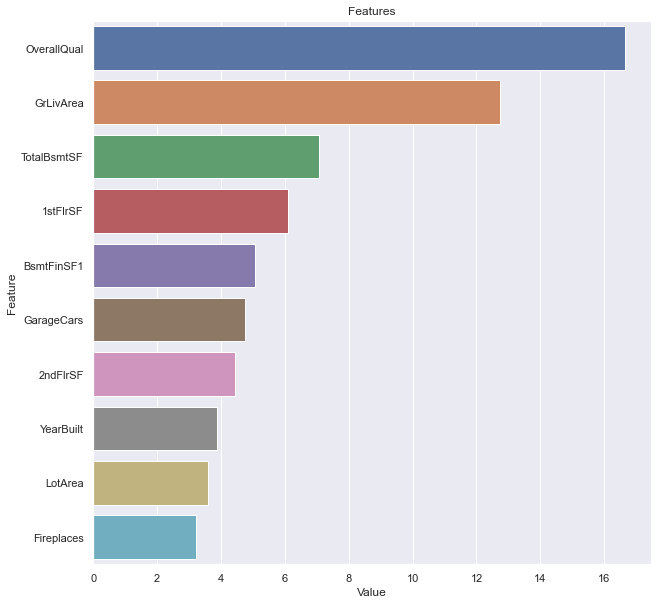

In [94]:
plot_importance(cat_final,X,10)

In [76]:
#Feature Engineering

In [93]:
df["OverallQual^2"] = df["OverallQual"]**2

In [95]:
df["FloorsSF"] = df["1stFlrSF"] + df["2ndFlrSF"]

In [96]:
df["TotalSF"] = df["FloorsSF"] + df["TotalBsmtSF"]

In [97]:
df["CarNGrLiv"] = df["GrLivArea"] + df["GarageCars"]

In [99]:
df["FireCaution"] = df["Fireplaces"]/df["GrLivArea"]

In [100]:
#scaling
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
df[num_cols_df] = rs.fit_transform(df[num_cols_df])

In [101]:
#Encoding
df=pd.get_dummies(df,drop_first=True)

In [102]:
X=df.loc[train.index]
y=train["SalePrice"]
test=df.loc[test.index]

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

In [105]:
cat_new = CatBoostRegressor(random_state=17)
cat_final = cat_new.set_params(**cat_best_grid.best_params_,random_state=17).fit(X_train,y_train)

0:	learn: 73710.5577097	total: 12.7ms	remaining: 5.05s
1:	learn: 69156.0502912	total: 25.6ms	remaining: 5.09s
2:	learn: 65131.9004602	total: 37ms	remaining: 4.89s
3:	learn: 61883.3503692	total: 48.5ms	remaining: 4.8s
4:	learn: 58573.9279679	total: 59.8ms	remaining: 4.72s
5:	learn: 55734.3345028	total: 71.2ms	remaining: 4.67s
6:	learn: 53102.6097190	total: 82.9ms	remaining: 4.66s
7:	learn: 50658.2220293	total: 94.4ms	remaining: 4.62s
8:	learn: 48289.6438089	total: 112ms	remaining: 4.86s
9:	learn: 45985.3775077	total: 124ms	remaining: 4.82s
10:	learn: 44106.5595228	total: 133ms	remaining: 4.7s
11:	learn: 42448.5999738	total: 143ms	remaining: 4.62s
12:	learn: 40926.8944167	total: 153ms	remaining: 4.55s
13:	learn: 39447.8520795	total: 162ms	remaining: 4.46s
14:	learn: 38110.1876867	total: 171ms	remaining: 4.39s
15:	learn: 36795.8811236	total: 180ms	remaining: 4.33s
16:	learn: 35586.2385270	total: 190ms	remaining: 4.27s
17:	learn: 34540.9171966	total: 199ms	remaining: 4.22s
18:	learn: 33728

154:	learn: 12335.0520397	total: 1.79s	remaining: 2.83s
155:	learn: 12329.6568998	total: 1.8s	remaining: 2.82s
156:	learn: 12283.0352290	total: 1.81s	remaining: 2.8s
157:	learn: 12241.2856090	total: 1.82s	remaining: 2.79s
158:	learn: 12218.3744968	total: 1.83s	remaining: 2.78s
159:	learn: 12183.8980960	total: 1.84s	remaining: 2.76s
160:	learn: 12133.4650981	total: 1.85s	remaining: 2.75s
161:	learn: 12095.4573372	total: 1.86s	remaining: 2.73s
162:	learn: 12056.4583269	total: 1.87s	remaining: 2.72s
163:	learn: 12022.6232702	total: 1.88s	remaining: 2.71s
164:	learn: 11964.9458065	total: 1.89s	remaining: 2.69s
165:	learn: 11913.1058959	total: 1.9s	remaining: 2.68s
166:	learn: 11865.4897835	total: 1.91s	remaining: 2.66s
167:	learn: 11827.6228628	total: 1.92s	remaining: 2.65s
168:	learn: 11767.9164079	total: 1.93s	remaining: 2.63s
169:	learn: 11729.9329416	total: 1.93s	remaining: 2.62s
170:	learn: 11677.0293886	total: 1.94s	remaining: 2.6s
171:	learn: 11633.0212880	total: 1.95s	remaining: 2.

305:	learn: 7604.1026228	total: 3.39s	remaining: 1.04s
306:	learn: 7588.7455897	total: 3.4s	remaining: 1.03s
307:	learn: 7573.3751732	total: 3.42s	remaining: 1.02s
308:	learn: 7544.7018716	total: 3.43s	remaining: 1.01s
309:	learn: 7529.7680296	total: 3.44s	remaining: 998ms
310:	learn: 7521.7348569	total: 3.44s	remaining: 986ms
311:	learn: 7499.6771234	total: 3.46s	remaining: 975ms
312:	learn: 7482.9313283	total: 3.46s	remaining: 963ms
313:	learn: 7463.7796951	total: 3.47s	remaining: 951ms
314:	learn: 7454.5749831	total: 3.48s	remaining: 940ms
315:	learn: 7451.8343949	total: 3.49s	remaining: 928ms
316:	learn: 7423.3343987	total: 3.5s	remaining: 917ms
317:	learn: 7420.4726403	total: 3.51s	remaining: 905ms
318:	learn: 7393.4460203	total: 3.52s	remaining: 894ms
319:	learn: 7366.9877759	total: 3.53s	remaining: 882ms
320:	learn: 7346.8725708	total: 3.54s	remaining: 871ms
321:	learn: 7331.0640025	total: 3.55s	remaining: 859ms
322:	learn: 7300.8469403	total: 3.56s	remaining: 848ms
323:	learn: 

In [106]:
pred = cat_final.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
rmse

20770.79226915557

In [ ]:
#Özellik mühendisliği sonrası da modelde hata sonucunda iyileşme gözlenmiştir.